<a href="https://colab.research.google.com/github/dhanushpachabhatla/my-machine-learning-notes/blob/main/mini_batch_gradient_descent_in_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Batch GD in LR

* it has properties of both batch and stochastic

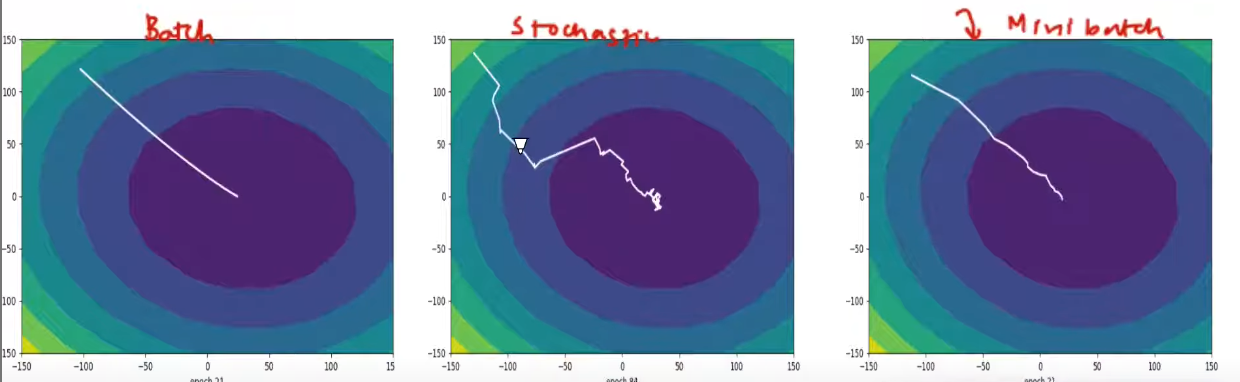

In [4]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [5]:
X,y = load_diabetes(return_X_y=True)

In [6]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [10]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

* code form scrach

In [11]:
import random

class MBGDRegressor:

    def __init__(self,batch_size,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            for j in range(int(X_train.shape[0]/self.batch_size)):

                idx = random.sample(range(X_train.shape[0]),self.batch_size)

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                #print("Shape of y_hat",y_hat.shape)
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [12]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)

In [13]:
mbr.fit(X_train,y_train)

150.6256212247837 [  22.38536237 -143.59266883  458.63944027  319.82846296  -21.23901152
  -90.62005426 -193.91060481  115.40558181  412.54563585  119.90724022]


In [14]:
y_pred = mbr.predict(X_test)

In [15]:
r2_score(y_test,y_pred)

0.4518346940433997

* code from libarary

In [16]:
from sklearn.linear_model import SGDRegressor

In [17]:
sgd = SGDRegressor(learning_rate='constant',eta0=0.1)

In [18]:
batch_size = 35

for i in range(100):

    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx])

In [19]:
sgd.coef_

array([  65.43844324,  -77.47677221,  359.67090467,  244.12052762,
         19.58608824,  -28.40203894, -173.53919875,  126.51699455,
        319.02933358,  143.31246284])

In [20]:
sgd.intercept_

array([161.08283773])

In [21]:
y_pred = sgd.predict(X_test)

In [22]:
r2_score(y_test,y_pred)

0.4217026914328019